In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from Utils import mapFeatures, cmap_light, cmap_bold
from Calculus import Calculus

In [2]:
data = np.genfromtxt('../A2_datasets/microchips.csv', delimiter=',')
X, y = data[:, :-1], data[:, -1]

In [3]:
c = Calculus()

1. Use Logistic regression and mapFeatures from the previous exercise to construct nine different classifiers, one for each of the degrees d in [1; 9], and produce a figure containing a 3x3 pattern of subplots showing the corresponding decision boundaries. Make sure that you pass the argument C=10000

In [4]:
def plotDecisionBoundary(ax, X, y, model, degree):
    h = 0.01
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), 
                         np.arange(y_min, y_max, h))
    
    x1, x2 = xx.ravel(), yy.ravel()
    X_poly = mapFeatures(x1, x2, degree)

    Z = model.predict(X_poly)
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, cmap=cmap_light)
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    ax.set_title('Degree {}'.format(degree))

In [5]:
def fit_plot_classifiers(C):
    # construct and fit classifiers for each degree and regularization parameter
    _, axs = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

    for i, ax in enumerate(axs.flat):
        degree = i + 1
        X_poly = mapFeatures(X[:, 0], X[:, 1], degree)
        model = LogisticRegression(C=C, max_iter=1000)
        model.fit(X_poly, y)
        plotDecisionBoundary(ax, X, y, model, degree)

    plt.tight_layout()
    plt.show()

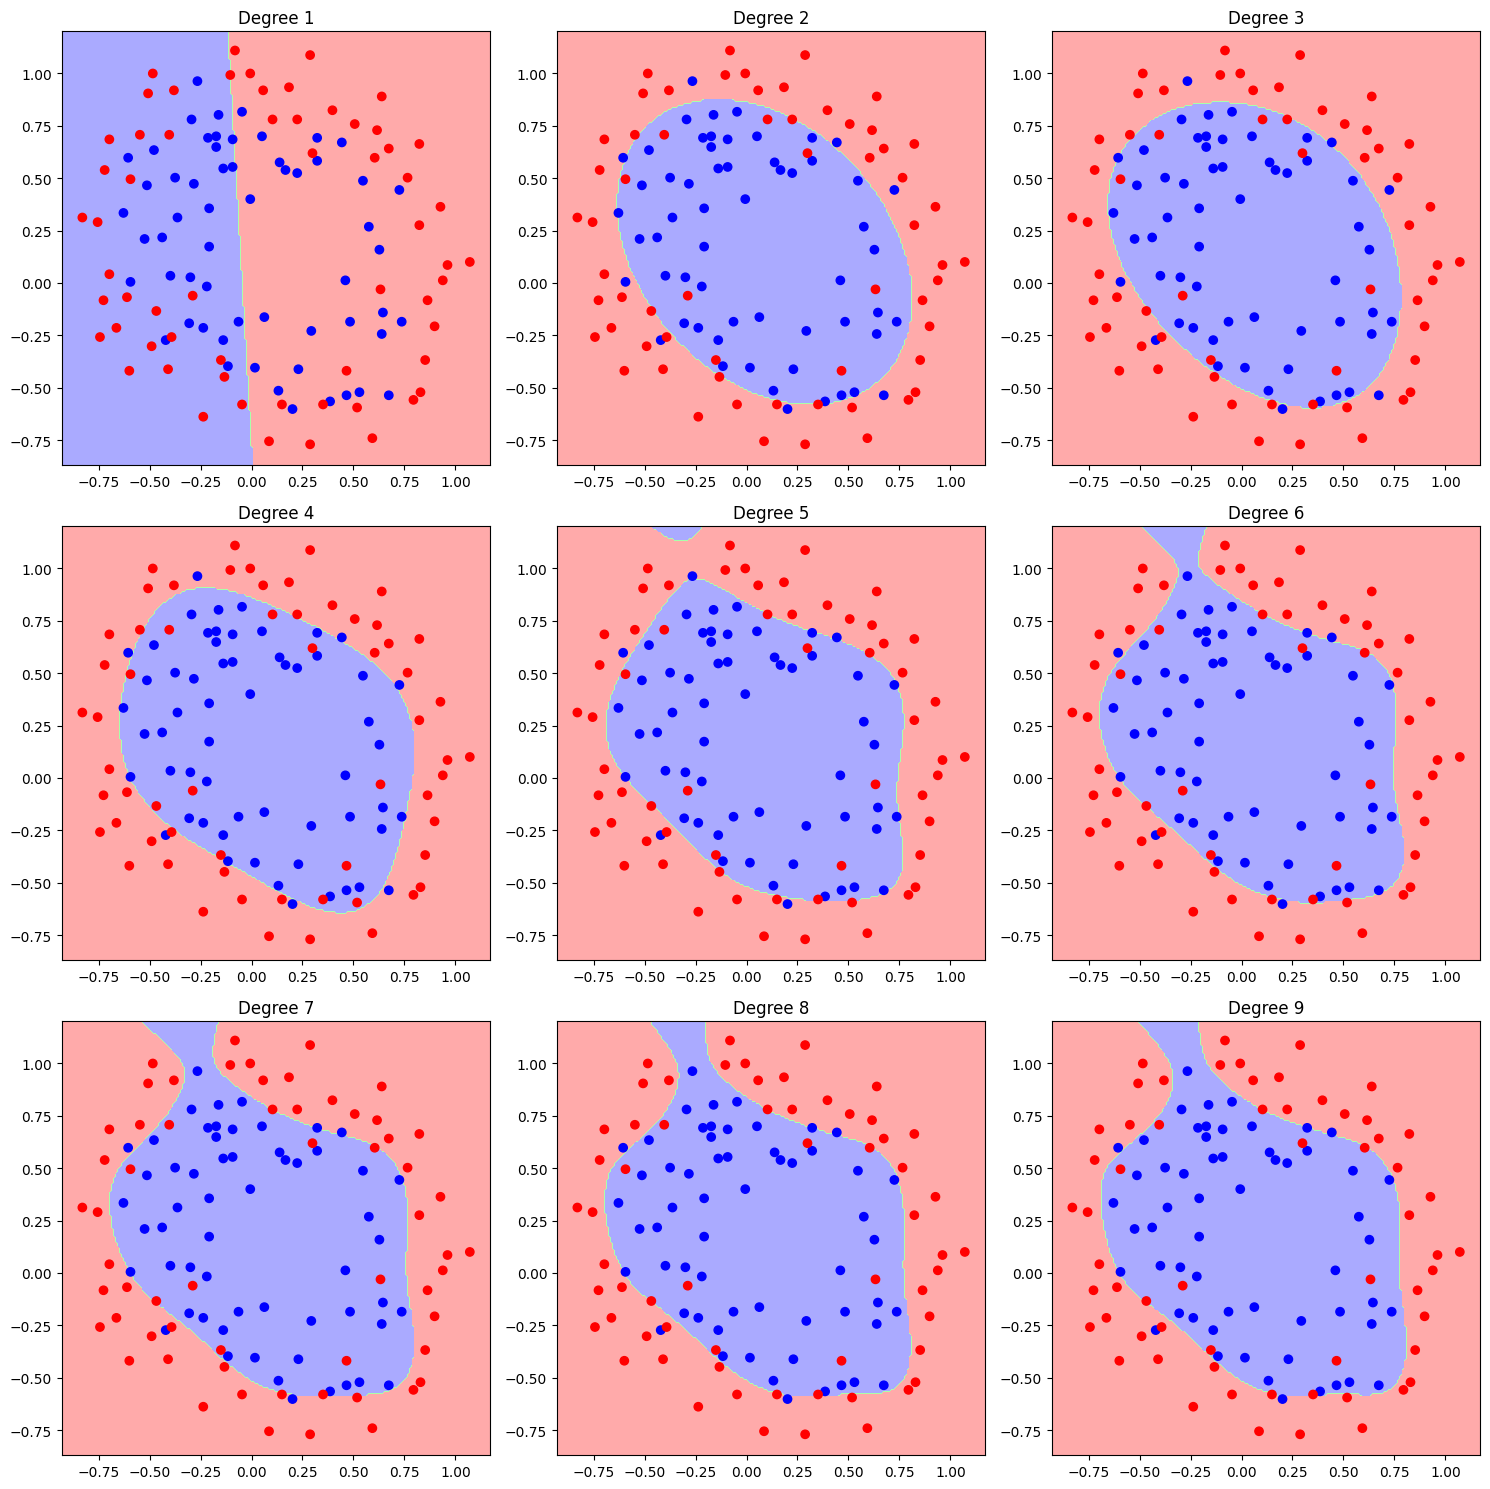

In [6]:
fit_plot_classifiers(C=10000)

2. Redo 1) but now use the regularization parameter C = 1. What is different than from the step in 1)?

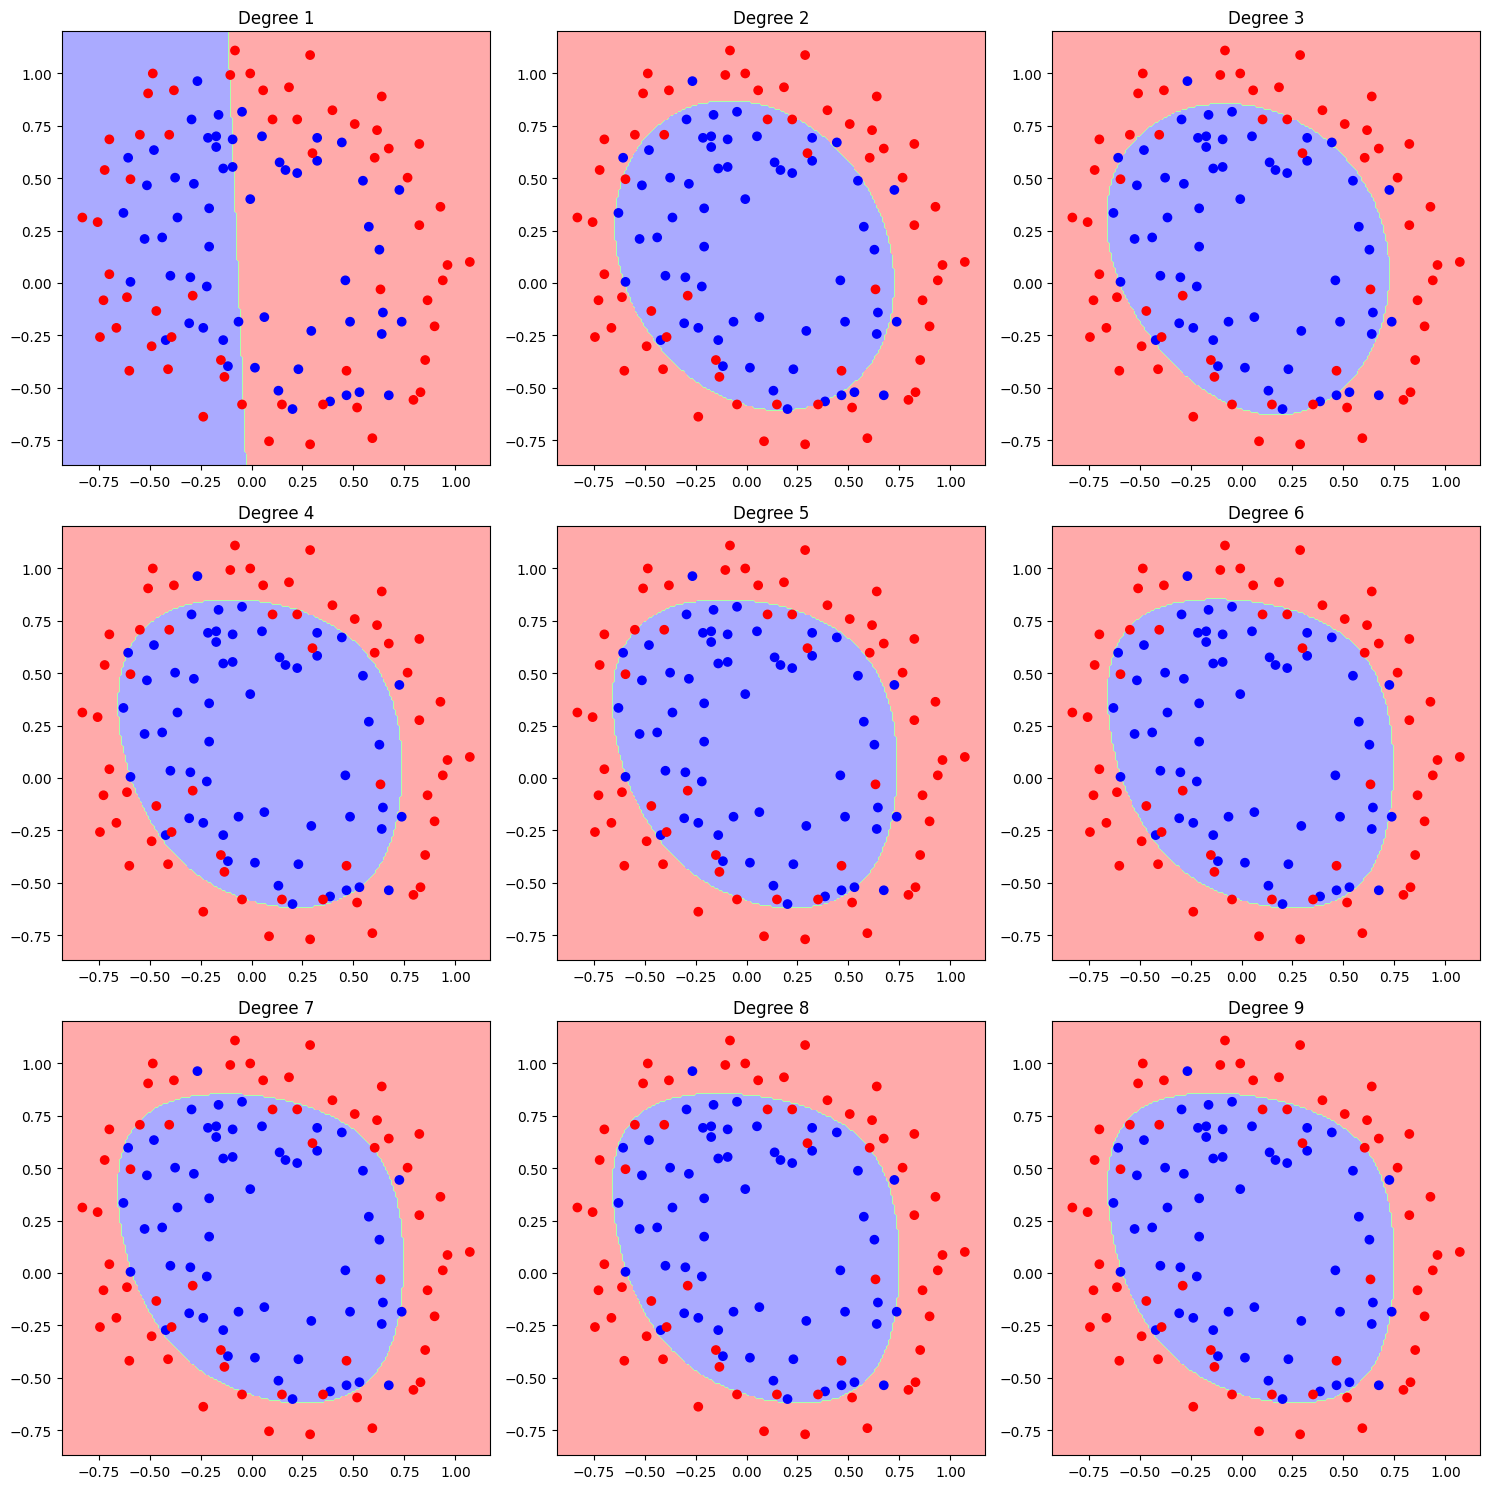

In [7]:
fit_plot_classifiers(C=1)

    The regularization parameter C controls the trade-off between maximizing the margin and minimizing the classification error on the training data. When C is set to a high value, like C=10000, the model is penalized less for making classification errors and more importance is given to maximizing the margin. This results in a model that is more prone to overfitting to the training data. On the other hand, when C is set to a small value, like C=1, the model is more penalized for making classification errors, which may lead to a simpler model with more emphasis on generalization to new data. With C=10000 resulted in a more complex model, while with C=1 resulted in a simpler model.

3. Finally, you should use cross-validation (in sklearn) to see which of the regularized and unregularized models performs best. The results could for instance be visualized in a graph where you plot the degree d vs. #errors, and differentiate regularized and unregularized by color.

    Creating a plot

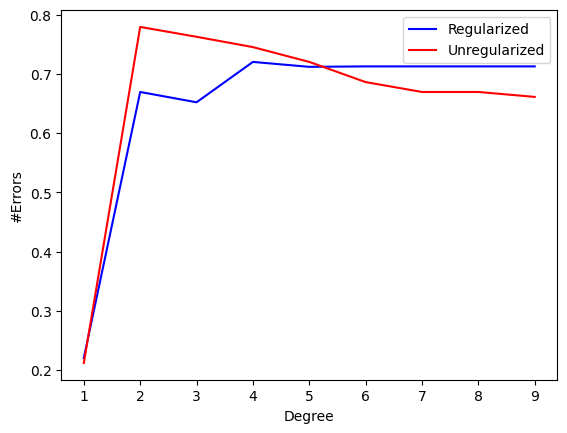

In [8]:
degrees = np.arange(1, 10)

scores_reg = []
scores_unreg = []

for degree in degrees:
    # create polynomial features
    X_poly = mapFeatures(X[:, 0], X[:, 1], degree)

    # create regularized and unregularized logistic regression models
    model_reg = LogisticRegression(C=1, max_iter=1000)
    model_unreg = LogisticRegression(C=10000, max_iter=1000)
    X_poly_fit = model_reg.fit(X_poly, y)

    # compute scores using cross-validation with 10 folds
    score_reg = np.mean(cross_val_score(model_reg, X_poly, y, cv=10))
    score_unreg = np.mean(cross_val_score(model_unreg, X_poly, y, cv=10))

    # Add scores to lists
    scores_reg.append(score_reg)
    scores_unreg.append(score_unreg)
    
# plot the results
plt.plot(degrees, scores_reg, color='b', label="Regularized")
plt.plot(degrees, scores_unreg, color='r', label="Unregularized")
plt.xlabel("Degree")
plt.ylabel("#Errors")
plt.legend()
plt.show()

    Other way of seeing

In [9]:
# Create a dictionary to store the results
results = {}
C_values = [1, 10000]
k = 5

# Loop over all degrees and regularization parameters
for degree in degrees:
    # Map the features to the given degree
    X_poly = mapFeatures(X[:, 0], X[:, 1], degree)

    for C in C_values:
        # Create a logistic regression model with the given regularization parameter
        model = LogisticRegression(C=C, max_iter=1000)

        # Compute the cross-validation score
        score = np.mean(cross_val_score(model, X_poly, y, cv=k))

        # Add the result to the dictionary
        results[(degree, C)] = score

# Find the best degree and regularization parameter
best_degree, best_C = max(results, key=results.get)
best_score = results[(best_degree, best_C)]

# Print the results
print("Best degree:", best_degree)
print("Best C value:", best_C)
print("Best score:", best_score)

Best degree: 2
Best C value: 10000
Best score: 0.7641304347826087


As we can see from both visualization and result number, the best model is the unregularized util the degree 5, and then the best model become the regularized. But the best performance of all is the degree 2 with the unregularized model, since it achieves the highest cross-validation score.